# Planet Coaster Rides Rating Prediction
Predict the rating of a roller coaster before building it.

Planet Coaster is a famous computer and console video game developed by Frontier. In this game the user creates and manages theme parks, from staff hiring to marketing campaigns. Basically the main goal is make guests happy, and in order to do so building attractive roller coasters is one of the most important tasks. When the user builds a new ride, this ride is tested by the artificial intelligence of the game, that simulates real riders, and then a final rating is shown.<br><br>
The rating system consists of three metrics: Excitement, Fear and Nausea, all this metrics must be in a certain interval to classify a ride as "good" in the game.<br>
The goal of this project is to build a model to **predict whether guests will like a roller coaster before actually building it**. In the game, but also in the real life, building a new roller coaster is very expensive and time consuming for a theme park, so the ability to know in advance if the visitors will enjoy the new ride or not is very important. <br><br>
In the roller coaster industry the design phase of a ride is important, and thanks to computer softwares and computer graphics it is possible to simulate with high details of realism how a coaster project will be once built. Also the analysis of the technical specs must be conducted properly in order to respect all the safety laws, for example G-forces cannot be over a certain threshold. As the result of a so detailed design, a project of a new ride consists of all the technical deatils the ride will have and starting from this details **the algorithm will classify a ride as "good" or "not good"** for the theme park visitors in the game. <br><br>
In order to solve this problem as a classification task, **the three ratings (Excitement, Nausea, Fear) will be "condensed" into a binary value.** This value is the dependent variable (y).
It is important to note that a ride is classified as "good" when:
1. Excitement is greater than 6.34 
2. Nausea is lesser than 3.5
3. Fear is greater than 4.0 and lesser than 6.0

In our project the **cost of False Positives > cost of False Negatives**, in fact build a ride that guets do not like it's more expensive than reject good-ride designs. Given that, the **important metric is the Precision**. Precision increases as the number of False Positives decreases. <br>

**Another important metric is the specificity**, indicating how good the model is at identify the "not good" class, the most important for us.

## Steps of the Project
The project consists of the following sections:

1. **Importing Tools**
2. **Data Reading**
3. **Exploratory Data Analysis and Data Cleaning**
4. **Some Visualization**
5. **Feature Engineering**
6. **Feature Importance and Selection**
7. **Splitting the data in training and testing sets**
8. **Feature Normalization**
9. **Choosing the Algorithm and Hyperparameter tuning**
10. **Performance of the model**
11. **ROC, AUC, Precision-Recall Curve**
12. **Threshold Tuning**
13. **Further Steps**
14. **Drawing conclusions — Summary**

## Data Set

The dataset it's been created by myself, and consists of **142 rows and 23 columns.** A new column will be added and will contain the **coaster class (response variable).** Each row is a rollercoaster created in the game, not all the rides are created by me. The majority of the columns **represent technical specification of the ride.** The definition of all the columns it is presented in the following sections. The dataset also **contains the values of the three scoring metrics: excitement, nausea and fear.**

## 1. Importing Tools

Importing all the needed packages. We will use all this tools during the different steps of the project.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import confusion_matrix, f1_score,precision_score, recall_score, accuracy_score, make_scorer, \
        roc_auc_score, roc_curve, precision_recall_curve

## 2. Data Reading

Reading and importing the dataset into a pandas dataframe and visualize some of the rows to have a **"bird view" of the data** we will work with. Then we look at all the column names.

In [49]:
# remove the col num limits and importing the dataset
pd.set_option("max_columns", None)
df=pd.read_csv("./Data/PlanetCoaster_DF.csv")
df

,Exitement,Fear,Nausea,Duration,Track_Lenght,Traversal_Lenght,Max_Speed,Avg_Speed,Biggest_Drop,Max_Lateral_g,Max_Vertical_g,Min_Vertical_g,Max_Forward_g,Min_Forward_g,Inversions_Num,Airtime_Count,Tot_Airtime_Duration,Coaster_ID,Coaster_Type,Coaster_Name,Launched,Shuttle,Coaster_Category
0,5.30,3.65,1.84,87.8,419,1247.0,98,51,34.0,3.36,4.67,-1.17,1.05,-0.74,8,0,0.0,1,Impulse,Reversed Loop,1,1,Steel
1,6.20,4.56,1.71,45.7,671,NaN,97,53,7.0,4.03,4.30,-0.42,0.82,-1.46,0,3,2.4,2,Motorbike,BikeRide,1,0,Steel
2,6.79,5.00,2.59,71.4,1411,NaN,123,71,35.0,2.67,6.37,-0.70,1.05,-1.05,6,2,1.4,3,Wing,Raptor Runner,1,0,Steel
3,6.51,4.12,1.53,67.9,1222,NaN,110,65,37.0,2.66,5.79,-2.38,0.53,-0.84,8,2,0.6,4,Wing,Afterburn,1,0,Steel
4,6.50,5.16,2.51,143.4,1552,NaN,126,39,61.0,5.04,6.85,-1.53,0.71,-1.06,0,11,8.5,5,Wooden,Air Gain,0,0,Wooden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,7.21,5.12,2.31,72.2,939,NaN,91,47,24.0,3.13,4.77,-1.97,0.56,-2.33,0,6,4.6,138,Wooden,NaN,0,0,Wooden
138,6.07,4.15,2.06,59.6,572,NaN,86,35,27.0,5.29,4.87,-2.01,0.71,-1.45,0,4,4.2,139,Wooden,Gnarlerer,0,0,Wooden
139,6.78,4.98,2.05,68.6,1026,NaN,101,54,24.0,3.69,5.46,-1.23,1.15,-1.29,5,4,2.1,140,Launched,NaN,1,0,Steel
140,6.18,4.29,1.40,122.2,1536,NaN,135,45,74.0,4.57,5.81,-1.89,0.71,-0.69,0,8,6.0,141,Hyper,Equalizer2021,0,0,Steel


In [50]:
# all the columns in the dataset
df.columns

Index(['Exitement', 'Fear', 'Nausea', 'Duration', 'Track_Lenght',
       'Traversal_Lenght', 'Max_Speed', 'Avg_Speed', 'Biggest_Drop',
       'Max_Lateral_g', 'Max_Vertical_g', 'Min_Vertical_g', 'Max_Forward_g',
       'Min_Forward_g', 'Inversions_Num', 'Airtime_Count',
       'Tot_Airtime_Duration', 'Coaster_ID', 'Coaster_Type', 'Coaster_Name',
       'Launched', 'Shuttle', 'Coaster_Category'],
      dtype='object')

### Variables Description

The dataset contains **23 columns**, but not all are important for the analysis. Here a brief description of the columns:
* **Exitement**: The level of excitement of the ride, numrical value.
* **Fear**: The level of fear of the ride, numerical value.
* **Nausea**: The level of nausea of the ride, numerical value.
* **Duration**: The duration of the ride in seconds.
* **Track_Lenght**: The length of the track in meters.
* **Traversal_Lenght**: This apply only to few observations and refers to the "geographical space" occupied by the ride. It is not important in our analysis.
* **Max_Speed**: The maximum speed reached by the train in km/h.
* **Avg_Speed**: The average speed of the train in km/h.
* **Biggest_Drop**: Length of largest gap between high and low points of roller coaster in meters.
* **Max_Lateral_g**: Maximum lateral g force perceived by riders, expressed in g-force.
* **Max_Vertical_g**: Maximum vertical g force perceived by riders, expressed in g-force.
* **Min_Vertical_g**: Minimum vertical g force perceived by riders, expressed in g-force.
* **Max_Forward_g**: Maximum forward g force perceived by riders, expressed in g-force.
* **Min_Forward_g**: Minimum forward g force perceived by riders, expressed in g-force.
* **Inversions_Num**: Number of times roller coaster flips passengers, numerical value.
* **Airtime_Count**: Number of all airtime perceived during the ride, numerical value. Airtime means when riders of a roller coaster experience either weightlessness or negative G-forces.
* **Tot_Airtime_Duration**: Total time of airtime expressed in seconds.
* **Coaster_ID**: Id of the coaster, incremental numerical value.
* **Coaster_Type**: Type of roller coaster, category. There are 34 different roller coaster types in the dataset. This type refers to the style of the track and the style of the train, how passengers are seated or not seated and aslo the kind of restrictions.
* **Coaster_Name**: Name of the ride, string.
* **Launched**: Flag indicating if the ride uses a launching system to propel the train at a speed. 0 if not launched, 1 if launched.
* **Shuttle**: Flag indicating if the ride is shuttle or not. 0 if not shuttle, 1 if shuttle. A shuttle ride is not a closed circuit ride meaning the train runs also backward to come back to the station.
* **Coaster_Category**: The main category of the coaster --> Steel = ride made of steel, Wooden = ride made of wood, Hybrid = ride made with parts of steel and parts of wood.

## 3. Explanatory Data Analysis

**Exploratory data analysis** consists of analyzing the main characteristics of a dataset. The objective is to better **understand the data** and check if **cleaning procedures** are needed.<br>
Let's start with some info about the dataset.

In [51]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Exitement             142 non-null    float64
 1   Fear                  142 non-null    float64
 2   Nausea                142 non-null    float64
 3   Duration              142 non-null    float64
 4   Track_Lenght          142 non-null    int64  
 5   Traversal_Lenght      15 non-null     float64
 6   Max_Speed             142 non-null    int64  
 7   Avg_Speed             142 non-null    int64  
 8   Biggest_Drop          142 non-null    float64
 9   Max_Lateral_g         142 non-null    float64
 10  Max_Vertical_g        142 non-null    float64
 11  Min_Vertical_g        142 non-null    float64
 12  Max_Forward_g         142 non-null    float64
 13  Min_Forward_g         142 non-null    float64
 14  Inversions_Num        142 non-null    int64  
 15  Airtime_Count         1

As shown above, the dataset contains **142 observations**. Apparently only the traversal_length and coaster_name columns have null values, but this columns are not important for the prediction.<br>
All the other columns have **no null values**. <br>
All the **data types** are detected correctly by pandas.

#### Coaster Types and Categories
The main categories are only three, but the coaster types are much more. Each coaster type belongs to only one main category.

In [52]:
# unique coaster categories
df["Coaster_Category"].unique()

array(['Steel', 'Wooden', 'Hybrid'], dtype=object)

In [53]:
# unique coaster types
df["Coaster_Type"].unique()

array(['Impulse', 'Motorbike', 'Wing', 'Wooden', 'Inverted', 'Steel',
       'Water', 'Hybrid', 'Boomerang', 'InvertedLooping', 'SpinningMouse',
       'Spinning', 'Hyper', 'Flying', 'Floorless', 'Dive', 'MineTrain',
       'Bobsled', 'Junior', 'EuroFighter', 'Looping', 'Giga', 'Suspended',
       'WoodenSideFriction', 'WildMouse', 'InvertedBoomerang', 'Infinity',
       'X-dimension', 'Standup', 'StarLoop', 'Launched',
       'Reverse Free Fall', 'SingleRail', 'Skyloop'], dtype=object)

#### Dataframe summary statistics
The *describe()* methods provides some statistics that help to start digging into the dataset.<br>
It is interesting to see that the majority of rides have an **excitement lesser then 6.6**, possibly indicating how difficult it is to design high-excitement rides. Also few observations are launched or shuttle coasters.

In [54]:
# high level description of the dataset
df.describe()

,Exitement,Fear,Nausea,Duration,Track_Lenght,Traversal_Lenght,Max_Speed,Avg_Speed,Biggest_Drop,Max_Lateral_g,Max_Vertical_g,Min_Vertical_g,Max_Forward_g,Min_Forward_g,Inversions_Num,Airtime_Count,Tot_Airtime_Duration,Coaster_ID,Launched,Shuttle
count,142.000000,142.000000,142.000000,142.000000,142.000000,15.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.673380,4.141761,1.505282,101.454225,992.042254,1021.637333,106.866197,40.288732,44.919648,2.900704,5.357183,-1.208873,0.856901,-1.186690,2.866197,2.802817,1.922535,71.500000,0.190141,0.084507
std,1.340398,1.225950,0.811221,44.933741,528.476398,484.632787,38.423218,16.690585,39.635067,1.148419,1.543771,1.040986,0.494155,0.552654,3.464570,2.973260,2.430142,41.135953,0.393801,0.279131
min,2.510000,1.820000,0.210000,23.000000,176.000000,12.560000,43.000000,9.000000,0.000000,0.000000,-0.830000,-4.450000,-0.290000,-4.190000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.830000,3.350000,0.940000,71.250000,604.250000,766.000000,82.250000,30.000000,21.250000,2.202500,4.255000,-1.675000,0.710000,-1.437500,0.000000,1.000000,0.300000,36.250000,0.000000,0.000000
50%,5.720000,4.055000,1.360000,94.750000,830.500000,1017.000000,101.000000,38.000000,35.000000,2.715000,5.365000,-1.120000,0.750000,-1.130000,2.000000,2.000000,1.200000,71.500000,0.000000,0.000000
75%,6.642500,4.905000,2.045000,121.875000,1288.000000,1228.000000,122.750000,48.000000,55.500000,3.497500,6.560000,-0.582500,0.870000,-0.880000,5.000000,4.000000,2.500000,106.750000,0.000000,0.000000
max,8.360000,9.840000,4.420000,299.200000,3029.000000,2065.000000,282.000000,107.000000,259.000000,6.000000,8.320000,3.230000,4.740000,0.000000,16.000000,19.000000,13.000000,142.000000,1.000000,1.000000


All the max and min values are consistent and there seems to be no technical specs not possible in real life rides.

## 3.1. Data Cleaning
Data Cleaning is a fundamental step in data science. The goal is to *clean* the data, that means **fix incorrect, inaccurate, incomplete and missing parts**.<br><br>

A typical cleaning approach involves this steps:
* Dropping inconsistent/unnecessary columns
* Handle missing data
* Handle outliers
* Tidy the dataset
* Check data types


### Dropping Useless Columns
Traversal_length, coaster_id, coaster_name are **useless to explain whether a ride is good or not**. Therefore, this cloumns need to be dropped.

In [55]:
# dropping in place useless columns
df.drop(columns=['Traversal_Lenght', 'Coaster_ID', 'Coaster_Name'], 
        inplace=True)

### Handle Missing Data
As shown in the EDA phase, we have not missing values in the columns of interest. No more steps are needed.


### Handle Outliers
All the observation have been **collected by me directly from the game**, so measurement **errors are not present** in this dataset. Also there are some roller coaster with higher values of speed, drop and G-forces. I consider this rides as **extreme and unique rides** instead of outliers. This also happen in real life, where **only few roller coatser are extremely high or fast**. <br><br>
In general some methods for handling outliers are:
* IQR --> [Q1-IQR\*1.5, Q3+IQR\*1.5]
* DBSCAN --> density clastering base algorithm. Outliers are in low-density regions.
* other

### Handle Duplicated Rows
In the dataset each coaster has a unique ID. It's important to note that roller coasters manufacturers generally sells "pre-designed" rollercoasters, this means **one coaster can be present in a large number of theme parks**, with different names and different customizations (colors) but the **technical specifications are exactly the same.** This coasters, even if equals, are intended to be two different rides, with different names and colors and in different theme parks. **Are not considered as duplicated.** <br> In this dataset however, the majority of the rides are "custom-built" and so different from each other.

### Tidy Dataset
By definition, a dataset is tidy when:

1. **Each variable is a column**
2. **Each observation is a row**
3. **Each type of observational unit is a table** --> each cell is a measurement

This dataset is tidy.

### Check DataTypes
As shown in the EDA phase, all the datatype are correctly recognized by pandas.

## 4. Some Visualization
In this section there are some visualization that may help to better understand the data and it's distribution. The first plot shows the **relation between the three metrics** and **their distribution** regarding the three main coaster categories.

Text(0.5, 1.1, 'Relation between Metrics and Distribution of Main Categories')

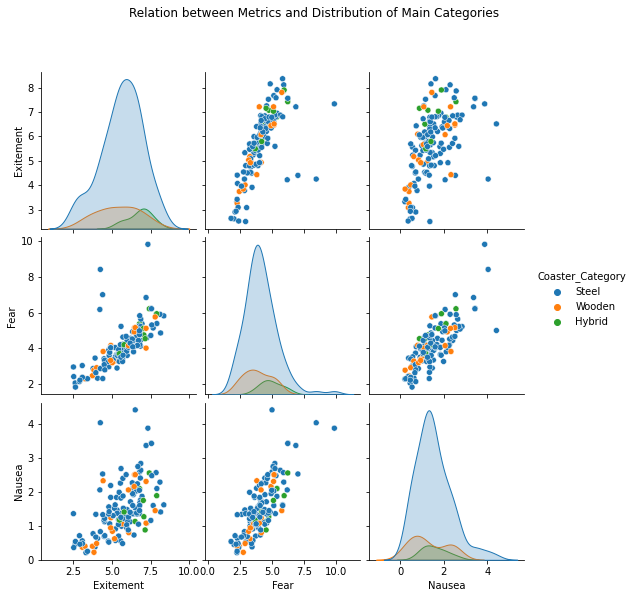

In [56]:
# pairplot excitement fear nausea vs coaster category
g = sns.pairplot(df, vars=['Exitement', 'Fear', 'Nausea'], hue="Coaster_Category")

g.fig.suptitle("Relation between Metrics and Distribution of Main Categories", y=1.1)

It appears to be a **relation between excitement and fear**. Also **fear and nausea seems to be in some sort of relation**. The hypotesis here is that nausea affects the fear, and the fear affects the excitement. **Basically these three metrics are interrelated influencing each other**.<br>
The coaster class attribute we are going to create and use to classify the rides, is a resume of the three metrics.

***

The following boxplots show the **distribution of the rides for each category** based on the three metrics of evaluation of a ride. Hybrid coasters seems to be the most exciting and also the most scaring. Steel coasters have the wider range of excitement, fear and nausea. <br>
**Basically hybrid coasters are very attractive and rides are similar to each other (homogeneous). Wooden and steel coasters can be both attracting and boring and are more varied.** <br>
There are a few observations of steel coasters which presents higher values of fear and nausea.

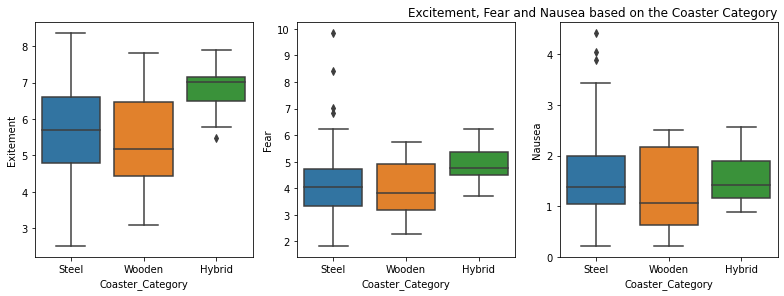

In [57]:
# boxplots excitement fear nasuea vs coaster category
fig, axs = plt.subplots(1, 3, figsize=(11,4))

sns.boxplot(x="Coaster_Category", y="Exitement", 
            data=df, dodge=False, ax=axs[0])

sns.boxplot(x="Coaster_Category", y="Fear", 
            data=df, dodge=False, ax=axs[1])

sns.boxplot(x="Coaster_Category", y="Nausea", 
            data=df, dodge=False, ax=axs[2])

plt.tight_layout()
plt.title("Excitement, Fear and Nausea based on the Coaster Category", 
            loc="right")
plt.show()

***

In the following histogram we can see clearly that **Steel coasters are the most popular** in the dataset, followed by Wooden and Hybrid coasters. **This categories are heavily unbalanced**.

Text(0.5, 1.0, 'Ride count for each Category')

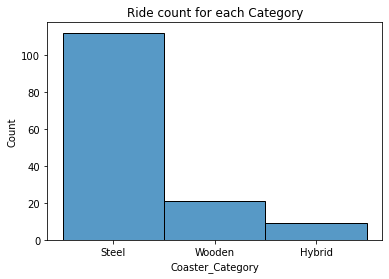

In [58]:
# coaster categories histogram
sns.histplot(df, x="Coaster_Category").set_title("Ride count for each Category")

***

Plotting the rides with a good excitement for each category it seems that Steel coaster are the most exciting, **but this result is due to the higher number of observation belonging to steel coasters.** In reality the coaster category with the highest ratio between number of rides and good excitement rides is the hybrid one. See next plots.

Text(0.5, 1.0, 'Rides with good Excitement for each Category')

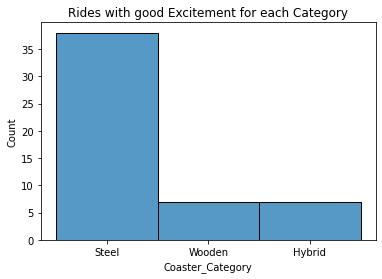

In [59]:
# number of rides with good excitement per category - biased visualization
sns.histplot(df[df["Exitement"]>6.34], x="Coaster_Category").set_title("Rides with good Excitement for each Category")

The ratio between number of rides and good excitement ride for each category show that **hybrid coaster are the most exciting**. In fact the **78% of the observation of hybrid coasters** have a **good excitement.** The **34% of steel and 33% wooden** coasters have a **good excitement rating.** <br>
The values of the ratios are in the following table.

In [60]:
# ratio between good excitement rides and total rides for each category
# getting rides with good excitement
goodex = df[df["Exitement"]>6.34]

# getting the rides belonging to each category
steel = df[df["Coaster_Category"]=="Steel"]
wooden = df[df["Coaster_Category"]=="Wooden"]
hybrid = df[df["Coaster_Category"]=="Hybrid"]

# computing the ratio: (good ride for category) / (total num of rides per category)
ratioSteel = goodex[goodex["Coaster_Category"]=="Steel"].shape[0] / steel.shape[0]
ratioWooden = goodex[goodex["Coaster_Category"]=="Wooden"].shape[0] / wooden.shape[0]
ratioHybrid = goodex[goodex["Coaster_Category"]=="Hybrid"].shape[0] / hybrid.shape[0]

# creating a dataframe with the ratio values
l=[["Steel", ratioSteel],
    ["Hybrid", ratioHybrid],
    ["Wooden", ratioWooden]]
ratioCategory=pd.DataFrame(l)
ratioCategory.columns=["Category", "Ratio"]
ratioCategory


,Category,Ratio
0,Steel,0.339286
1,Hybrid,0.777778
2,Wooden,0.333333


**Hybrid coaster have the highest ratio of good Excitement rides. Steel and Wooden are almost equal.**

Text(0.5, 1.0, 'Good Excitement Ride Ratio per Category')

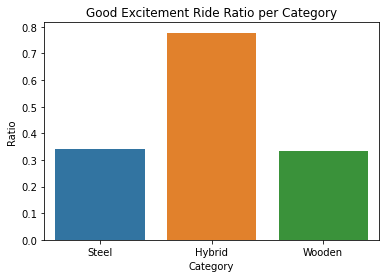

In [61]:
# unbiased visualization
sns.barplot(data=ratioCategory, x="Category", y="Ratio").set_title("Good Excitement Ride Ratio per Category")

From this visualizations we can understand that:
* Hybrid coasters appears to be the most exciting (most homogeneous)
* Steel coaster are the most popular in this dataset (most frequent)
* Excitement, fear and nausea appears to be related
* Steel coasters cover the widest interval for all the three metrics (most varied)

## 5. Feature Engineering
The process of **extracting features from data and transforming them** into more suitable format for machine learning is named Feature Engineering. Encoding categorical variables is a classical step in this phase.

### Custom function to give a class to each coaster
For our classification task it is necessary to **convert the three metrics** (excitement, nausea and fear) **into a binary value**, that identify a good or a bad ride. In order to do so we create a **classify function that assigns to each observation a flag.**

In [62]:
# function to classify each ride as good or not good based on the values of the metrics
def classify(exitement, fear, nausea):
    outClass=0
    if (exitement > 6.34) and (nausea < 3.5) \
        and (fear > 4 and fear < 6):
        outClass = 1
    return outClass

### Adding the class to each ride
Using the *classify()* function, it is possible to assign a class to each ride. This class is inserted into a new variable called **coaster_class**. This feature is the dependent variable.

In [63]:
# classify each ride in the dataframe and add the new column
for index, row in df.iterrows():
    classValue=classify(row["Exitement"], row["Fear"], row["Nausea"])
    df.at[index, "coaster_class"]=classValue

# set integer type to the new column
df["coaster_class"]=df["coaster_class"].astype(np.int64)

# print the dataframe
df

,Exitement,Fear,Nausea,Duration,Track_Lenght,Max_Speed,Avg_Speed,Biggest_Drop,Max_Lateral_g,Max_Vertical_g,Min_Vertical_g,Max_Forward_g,Min_Forward_g,Inversions_Num,Airtime_Count,Tot_Airtime_Duration,Coaster_Type,Launched,Shuttle,Coaster_Category,coaster_class
0,5.30,3.65,1.84,87.8,419,98,51,34.0,3.36,4.67,-1.17,1.05,-0.74,8,0,0.0,Impulse,1,1,Steel,0
1,6.20,4.56,1.71,45.7,671,97,53,7.0,4.03,4.30,-0.42,0.82,-1.46,0,3,2.4,Motorbike,1,0,Steel,0
2,6.79,5.00,2.59,71.4,1411,123,71,35.0,2.67,6.37,-0.70,1.05,-1.05,6,2,1.4,Wing,1,0,Steel,1
3,6.51,4.12,1.53,67.9,1222,110,65,37.0,2.66,5.79,-2.38,0.53,-0.84,8,2,0.6,Wing,1,0,Steel,1
4,6.50,5.16,2.51,143.4,1552,126,39,61.0,5.04,6.85,-1.53,0.71,-1.06,0,11,8.5,Wooden,0,0,Wooden,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,7.21,5.12,2.31,72.2,939,91,47,24.0,3.13,4.77,-1.97,0.56,-2.33,0,6,4.6,Wooden,0,0,Wooden,1
138,6.07,4.15,2.06,59.6,572,86,35,27.0,5.29,4.87,-2.01,0.71,-1.45,0,4,4.2,Wooden,0,0,Wooden,0
139,6.78,4.98,2.05,68.6,1026,101,54,24.0,3.69,5.46,-1.23,1.15,-1.29,5,4,2.1,Launched,1,0,Steel,1
140,6.18,4.29,1.40,122.2,1536,135,45,74.0,4.57,5.81,-1.89,0.71,-0.69,0,8,6.0,Hyper,0,0,Steel,0


### Cecking the balance of the Classes
It is important to check if the two classes are balanced. We count the rows for each class and then plot this information.

In [64]:
# NOT GOOD class num of observtions
df[df["coaster_class"]==0]["coaster_class"].count()

97

In [65]:
# GOOD class num of observtions
df[df["coaster_class"]==1]["coaster_class"].count()

45

Text(0.5, 1.0, 'Coaster Class Balance')

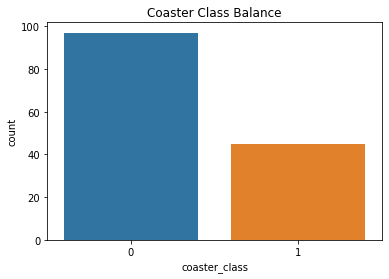

In [66]:
# plot showing proportions
sns.countplot(data=df, x="coaster_class").set_title("Coaster Class Balance")

The two **classes are not perfectly balanced**, with 97 observation from the not good class and 45 from the good class. **This confirms that building good rides is non-trivial.**

### Encoding Categorical Variables

Encoding categorial varibale is important because algorithm are not always able to interpret or doing calculation on non-numerical values. We proceed to encode the coaster category using a **One Hot Encoding solution**. One-hot encoding creates a **new binary column for each value of the original variable.** The *get_dummies()* function does this for us, creating three new columns. This solution works weel **when the number of category is not big**. A disadvantage of this approach is the significant **increase in the dimensionality** of the dataset. Generally one of this new columns is dropped before fitting the algorithm, to avoid multicollinearity (Multicollinearity occurs where there is a dependency between the independent features).

In [67]:
# Dummy variables encoding for coaster category, provided by pandas
df = pd.get_dummies(df, columns=["Coaster_Category"])
df

,Exitement,Fear,Nausea,Duration,Track_Lenght,Max_Speed,Avg_Speed,Biggest_Drop,Max_Lateral_g,Max_Vertical_g,Min_Vertical_g,Max_Forward_g,Min_Forward_g,Inversions_Num,Airtime_Count,Tot_Airtime_Duration,Coaster_Type,Launched,Shuttle,coaster_class,Coaster_Category_Hybrid,Coaster_Category_Steel,Coaster_Category_Wooden
0,5.30,3.65,1.84,87.8,419,98,51,34.0,3.36,4.67,-1.17,1.05,-0.74,8,0,0.0,Impulse,1,1,0,0,1,0
1,6.20,4.56,1.71,45.7,671,97,53,7.0,4.03,4.30,-0.42,0.82,-1.46,0,3,2.4,Motorbike,1,0,0,0,1,0
2,6.79,5.00,2.59,71.4,1411,123,71,35.0,2.67,6.37,-0.70,1.05,-1.05,6,2,1.4,Wing,1,0,1,0,1,0
3,6.51,4.12,1.53,67.9,1222,110,65,37.0,2.66,5.79,-2.38,0.53,-0.84,8,2,0.6,Wing,1,0,1,0,1,0
4,6.50,5.16,2.51,143.4,1552,126,39,61.0,5.04,6.85,-1.53,0.71,-1.06,0,11,8.5,Wooden,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,7.21,5.12,2.31,72.2,939,91,47,24.0,3.13,4.77,-1.97,0.56,-2.33,0,6,4.6,Wooden,0,0,1,0,0,1
138,6.07,4.15,2.06,59.6,572,86,35,27.0,5.29,4.87,-2.01,0.71,-1.45,0,4,4.2,Wooden,0,0,0,0,0,1
139,6.78,4.98,2.05,68.6,1026,101,54,24.0,3.69,5.46,-1.23,1.15,-1.29,5,4,2.1,Launched,1,0,1,0,1,0
140,6.18,4.29,1.40,122.2,1536,135,45,74.0,4.57,5.81,-1.89,0.71,-0.69,0,8,6.0,Hyper,0,0,0,0,1,0


The situation for coaster type is different: there are 32 coaster types, too many for a one-hot encoding solution. In this case we use a **Label Encoder approach**. Label encoding replaces categorical values with numerical values: **every category is encoded with a different number**. A disadvantage of this approach is that some algorithms will consider higher labels as more important (this can be good when the categorical variable is ordered for importance). We keep in mind this aspect when interpreting the results of features importance (next steps).

In [68]:
# label encoder for coaster type
le=LabelEncoder()
res=le.fit_transform(df["Coaster_Type"])

# adding the encoded columns to the dataframe
df["coaster_type_encoded"]=res
df

,Exitement,Fear,Nausea,Duration,Track_Lenght,Max_Speed,Avg_Speed,Biggest_Drop,Max_Lateral_g,Max_Vertical_g,Min_Vertical_g,Max_Forward_g,Min_Forward_g,Inversions_Num,Airtime_Count,Tot_Airtime_Duration,Coaster_Type,Launched,Shuttle,coaster_class,Coaster_Category_Hybrid,Coaster_Category_Steel,Coaster_Category_Wooden,coaster_type_encoded
0,5.30,3.65,1.84,87.8,419,98,51,34.0,3.36,4.67,-1.17,1.05,-0.74,8,0,0.0,Impulse,1,1,0,0,1,0,9
1,6.20,4.56,1.71,45.7,671,97,53,7.0,4.03,4.30,-0.42,0.82,-1.46,0,3,2.4,Motorbike,1,0,0,0,1,0,18
2,6.79,5.00,2.59,71.4,1411,123,71,35.0,2.67,6.37,-0.70,1.05,-1.05,6,2,1.4,Wing,1,0,1,0,1,0,30
3,6.51,4.12,1.53,67.9,1222,110,65,37.0,2.66,5.79,-2.38,0.53,-0.84,8,2,0.6,Wing,1,0,1,0,1,0,30
4,6.50,5.16,2.51,143.4,1552,126,39,61.0,5.04,6.85,-1.53,0.71,-1.06,0,11,8.5,Wooden,0,0,1,0,0,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,7.21,5.12,2.31,72.2,939,91,47,24.0,3.13,4.77,-1.97,0.56,-2.33,0,6,4.6,Wooden,0,0,1,0,0,1,31
138,6.07,4.15,2.06,59.6,572,86,35,27.0,5.29,4.87,-2.01,0.71,-1.45,0,4,4.2,Wooden,0,0,0,0,0,1,31
139,6.78,4.98,2.05,68.6,1026,101,54,24.0,3.69,5.46,-1.23,1.15,-1.29,5,4,2.1,Launched,1,0,1,0,1,0,15
140,6.18,4.29,1.40,122.2,1536,135,45,74.0,4.57,5.81,-1.89,0.71,-0.69,0,8,6.0,Hyper,0,0,0,0,1,0,8


Now that all the categorical variables are encoded, we can drop the original columns.

In [69]:
# dropping the original column
df.drop(columns=["Coaster_Type"], inplace=True)

## 6. Feature Importance and Selection

In this section we are going to figure out **what are the most important features** in determining if a ride it's good or not. In particular **correlation matrices, statistical tests and mutual information** are the methods used. We need only the features which are highly dependent on the response variable.

### Correlation Matrix - Pearson coefficient

The following heatmap is a correlation matrix computed with the Paearson coefficient and plotted with seaborn. In statistics, the Pearson correlation coefficient is a **measure of linear correlation** between two sets of data.

(23.5, -0.5)

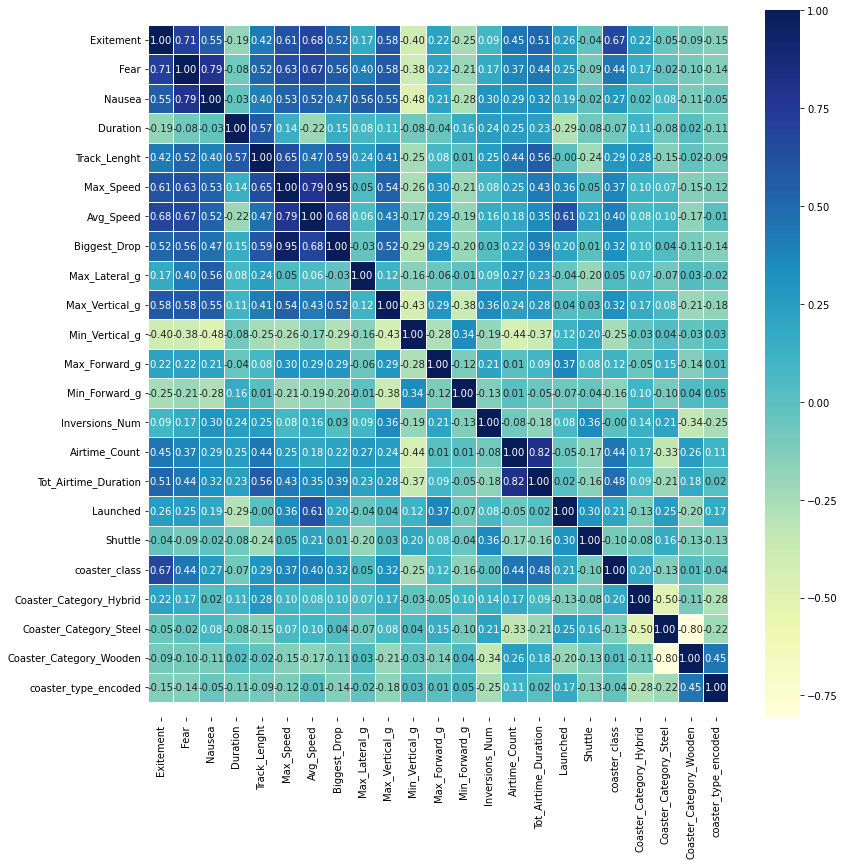

In [70]:
# corr matrix with pearson
corr_mat=df.corr()

# plotting with seaborn
fig, ax=plt.subplots(figsize=(13, 13))
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### Correlation Matrix - Spearman coefficient

The following heatmap is, like the above one, a correlation matrix but computed with the Spearman coefficient and plotted with seaborn. According to Wikipedia: *The Spearman coeff. assesses how well the relationship between two variables can be **described using a monotonic function.*** (<https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient>)

(23.5, -0.5)

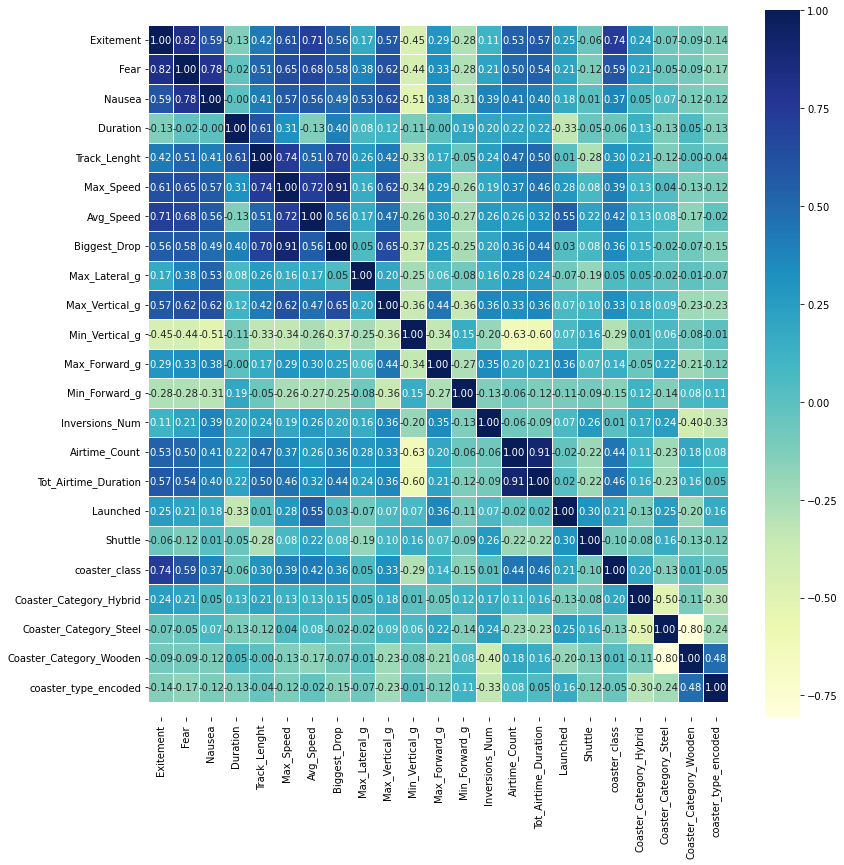

In [71]:
# corr matrix with spearman
corr_mat=df.corr(method='spearman')

# plotting with seaborn
fig, ax=plt.subplots(figsize=(13, 13))
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

Looking at the matrices we spot **some correlations**:
* exitement --> fear, nausea, max_speed, avg_speed, biggest_drop, max_vertical_g, tot_airtime_duration
* fear --> nausea, track_length, max_speed, avg_speed, biggest_drop, max_vertical_g
* nausea --> max_speed, avg_speed, max_lateral_g, max_vertical_g

This features seems to be **the most related to the parameters** we need to estimate:
* Max_Speed, Avg_Speed, Biggest_Drop, Max_Vertical_g, Tot_Airtime_Duration

Also appears to exist the following relations:
* avg_speed --> max_speed
* biggest_drop --> max_speed 
* tot_airtime_duration --> airtime_count

Most related to Coaster_Class:
* Max_Speed, Avg_Speed, Biggest_Drop, Max_Vertical_g, Airtime_count, Tot_Airtime_Duration

### Univariate Feature Selection - ANOVA F-test

This is another method to asses feature importance, based on the f-statistic.

The F-value in an ANOVA is calculated as: **variation between sample means / variation within the samples.** When the F-value increases, the p-value decreases. The F-test allows to understand **how much each variable is significant for the target variable.**

In order to do this test, we will use *SelectKBest()* function with *f_classif* as scoring function. The following custom function returns a dataframe with all the f-tests.

In [72]:
# custom function returns a dataframe with the f-test for each variable against the target one. K=num of features to return, alpha=significance level, X=features, y=target
def SelectBest(K, alpha, X, y):
    # fitting the kbest function
    bestFeatures = SelectKBest(score_func=f_classif, k=K)
    fit = bestFeatures.fit(X,y)
    new_X = bestFeatures.transform(X)
    # create dataframe for the results
    dfscores = pd.DataFrame(fit.scores_)
    dfpvalue = pd.DataFrame(fit.pvalues_)
    dfsignif = pd.DataFrame(fit.pvalues_ < alpha)
    dfcolumns = pd.DataFrame(X.columns)
    # concat dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores,dfpvalue,dfsignif],axis=1)
    # naming the dataframe columns and sorting
    featureScores.columns = ['Feature','ANOVA F-stats','p_value','p_value < alpha']
    featureScores.sort_values('ANOVA F-stats', inplace=True, ascending=False)
    return featureScores, new_X

We calculate the f-test and the p-values at a significance level of 99% (alpha = 0.01)

In [73]:
# selecting all the features except the target var
X = df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22]]
y = df["coaster_class"]

# computing the f-test for all the columns
result, new_X = SelectBest(19, 0.01, X, y)
result

,Feature,ANOVA F-stats,p_value,p_value < alpha
12,Tot_Airtime_Duration,41.056919,2.100605e-09,True
11,Airtime_Count,33.365491,4.736948e-08,True
3,Avg_Speed,27.026191,6.966583e-07,True
2,Max_Speed,22.708643,4.664014e-06,True
6,Max_Vertical_g,15.997512,1.022795e-04,True
4,Biggest_Drop,15.658743,1.201161e-04,True
1,Track_Lenght,13.198291,3.923938e-04,True
7,Min_Vertical_g,9.493769,2.482899e-03,True
13,Launched,6.456883,1.214216e-02,False
15,Coaster_Category_Hybrid,5.566712,1.968641e-02,False


The result shows the **most significant features** at a significance level of 99%. This results **confirm what was observed in the correlation matrices**.

### Mutual Information Score

The last method we use to check the importance of the features is the **Mutual Information Score**.

Mutual information (MI) between two variables is a measeure of **dependency between the variables.** It is equal to zero only if two variables are independent and **higher values mean higher dependency**.

The following custom function returns a dataframe with the **MI scores between the target variable and all the other features**, computed using the *mutual_info_classif()* function.

In [74]:
# custom function for the MI scores. 
def compute_mutual_information(X, y, seed):
    col_names = pd.DataFrame(X.columns)
    # MI computing
    mi = pd.DataFrame(mutual_info_classif(X,y,random_state=seed))
    # dataframe creation
    mutualInfo = pd.concat([col_names,mi],axis=1)
    # setting cols names
    mutualInfo.columns = ["Feature",'Importance']
    # ordering results
    mutualInfo.sort_values('Importance', inplace=True, ascending=False)
    return mutualInfo

In [75]:
# visualize feature importance
compute_mutual_information(X, y, 42)

,Feature,Importance
18,coaster_type_encoded,0.160860
12,Tot_Airtime_Duration,0.144943
3,Avg_Speed,0.107510
4,Biggest_Drop,0.085623
2,Max_Speed,0.079780
6,Max_Vertical_g,0.066985
15,Coaster_Category_Hybrid,0.059947
11,Airtime_Count,0.054434
9,Min_Forward_g,0.047347
8,Max_Forward_g,0.042332


Result are similar to the previous, except for two new features selected now as important:
* coaster_type_encoded --> maybe this depends on the encoding with labels
* Coaster_Category_Hybrid --> maybe because hybrid coaster have the highest ratio of good rides (78%)

### Create X and y with the selected features

Based on the result of the three methods of feature selection, now it's time to **choose the final features** to use for the predictions. **The most relevant one**.

In [76]:
# selecting the features that seems most 
# important for the prediction
X = df[["Airtime_Count", "Max_Speed", "Biggest_Drop", "Max_Vertical_g", "Track_Lenght", "Min_Vertical_g"]]
y = df["coaster_class"]

We have selected 6 features that according to the analysis are the most related to the target variable.

## 7. Splitting Data into Test and Train sets

An important step in order to later evaluate the performance of the model is **split the dataset in train and test sets**. We will work with the train dataset and use the test one to evaluate the goodness of the model. In order to split, we use *train_test_split()* function. In this project we select the **80% of the observations are used for training and the remaining 20% for testing.**

In [77]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 8. Features Normalization

Data Normalization is a **common practice** in machine learning. Consists of **transforming numeric columns to a common scale.** In machine learning, the features with higher values will dominate the learning process.

There are multiple normalization techniques in statistics. In this project, we will use the **min-max method** to rescale the numeric columns to a common scale. The min-max approach **rescales the feature to a fixed range of [0,1]** by subtracting the minimum value of the feature and then dividing by the range. The *MinMaxScaler* tool does this for us.

In [78]:
# normalization using MinMaxScaler
mmscaler = MinMaxScaler()
# fitting scaler on the train X
X_train_norm = mmscaler.fit_transform(X_train)
# trasforming test X with the fitted scaler
X_test_norm = mmscaler.transform(X_test)

## 9. Choosing the Algorithm and Hyperparameter tuning

Choosing the algorithm is a **non-trivial aspect**. Obviously it is important to know the algorithms, how they works and how they perform given the kind of project and the type of data. 
It is possible also to test different models with default parameters, and see how well they perform. <br>
For this project i will use the **SVM model** for different reasons:
* works well with unbalanced classes --> by setting class_weight as Balanced
* efficient training
* no local optimum points

This algorithm requires normalization or standardization of the dataset, as we did. <br>
We test the algorithm in a "black box" way first (deafult paramters) using a custom function that gives the possibility to test more than one model per time.

In [79]:
# generic function to score different models
def create_models(seed=42):
    models = []
    # setting the scorer to use precision metric
    scorer = make_scorer(precision_score)
    # we can append more than one model to test
    models.append(('support_vector_machines', SVC(random_state=seed)))
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [80]:
# test all the algorithms we specified. In this case only SVM
results = []
names = []
for name, model in models:
    # fit the model with the training data
    model.fit(X_train_norm, y_train)
    # make predictions with the testing data
    predictions = model.predict(X_test_norm)
    # calculate precision
    precision = precision_score(y_test, predictions)
    # calculate f1
    f1 = f1_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(precision)
    results.append(f1)
    names.append(name)
    # print classifier scores
    print('Classifier: {}, Precision: {}, F1: {})'.format(name, precision, f1))

Classifier: support_vector_machines, Precision: 0.75, F1: 0.4285714285714285)


The choosen algorithm seems to perform weel with default parameters. Now it's time to find the best parameters.

##### GridSearchCV to find Best Parameters

Once the algorithm is selected, we need to **find the best parameters**. *GridSearchCV* help in this taks. The first step is create a *parameters grid* with **all the combinations of parameters to test**. Then we set up a scorer based on the **most important metrics** for our project. I selected *f1_score* to have a trade-off between precisionand and recall. We set also the **probability flag to True**, in order to work later with different threshold values. We set the **class weight** to *balanced* in order to compensate for the minority class. We set the **cross validation folds number to 10** and with n_jobs=-1 all the cpu cores will be used.

In [81]:
# setting the parameters grid
param_grid = {'C': [1,10,100], # hardness of the margins
              'gamma': [0.1], #if higher svm tries to exactly fit the training set --> risk of overfitting
              'kernel': ['poly','rbf'], # radial babsis function / non linear
              'degree': [1,2], # used only by poly
              'random_state': [42],
              'class_weight': ['balanced'], # auto weight the classes inversionally proportional to the class frequency
              'probability': [True]}

# set the scorer with f1 score          
scorer = make_scorer(f1_score, average='weighted', zero_division=0) # average weighted by support | 0 is returned in case of division by 0

# setting up grid search
grid = GridSearchCV(SVC(), param_grid, cv=10, scoring=scorer, verbose=0, n_jobs=-1)

# fit the model
grid.fit(X_train_norm, y_train)

# print best parameters
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'class_weight': 'balanced', 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True, 'random_state': 42}
SVC(C=10, class_weight='balanced', degree=1, gamma=0.1, probability=True,
    random_state=42)


The previous step returned the best parameters for the algorithms. Now we can use the *predict_proba()* method to **predict the probability of belonging to one class or another.**

In [82]:
# getting predicted probability values

probability = grid.predict_proba(X_test_norm)

## 10. Performance of the Model
Evaluating the performance of the model is a very important step. In order to do so, i created two custom functions. The first to **convert the probability of belonging to a class into a final binary class** using a specified threshold. The second one return a dataframe with all the **metrics for the evaluation of the model**. This functions are described in the following sections. We use the probability from the previous step to assign to each sample a final class.

### Custom Function to convert a probability to a class using a threshold t

This function takes the probability from *predict_proba()* and a threshold value. **Then convert the probability to a binary class [0,1]**. Note that in the function we **consider the prbability to belong to the "1" class.**

In [83]:
# from probability to class value
def probs_to_prediction(probs, threshold):
    pred=[]
    for x in probs[:,1]:
        if x>threshold:
            pred.append(1)
        else:
            pred.append(0)
    return pred

### Custom Function to Evaluate Performance

This function return a dataframe with some evaluation metrics. <br><br>
The metrics considered are:
* Accuracy
* F1 score
* Recall
* Precision
* Specificity
* True Positive num
* True Negative num
* False Positive num
* False Negative num
* Size of the Test Set

In this project the important metric is the precision, that represents the proportion of positive predictions that are actually correct.

In [84]:
# Returns a dataframe with classification metrics 
# and confusion matrix values
def make_classification_score(y_test, predictions):
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel() # ravel() used to convert to a 1-D array

    prec=precision_score(y_test, predictions)
    rec=recall_score(y_test, predictions)
    f1=f1_score(y_test, predictions)
    acc=accuracy_score(y_test, predictions)
    # specificity
    spec=tn/(tn+fp)

    score = {'Accuracy': [acc], 'f1': [f1], 'Recall': [rec], 'Precision': [prec], 'Specificity': [spec], 'TP': [tp],'TN': [tn], 'FP': [fp], 'FN': [fn], 'y_test size': [len(y_test)]}
    df_score = pd.DataFrame(data=score)
    return df_score

### Model Evaluation with a Threshold = 0.5
Before doing some advanced threshold tuning, it is important to see **how our model works with the default threshold**, t=0.5. We convert the probability from the algorithm to a binary class [good ride, bad ride] with t=0.5, and then compute the evaluation scores.

In [85]:
predictions=probs_to_prediction(probability, 0.5)
make_classification_score(y_test, predictions)

,Accuracy,f1,Recall,Precision,Specificity,TP,TN,FP,FN,y_test size
0,0.793103,0.571429,0.4,1.0,1.0,4,19,0,6,29


The result is not bad. Our important metric, precision, is 1.0 and we have no false positives. We cannot say the same for the recall, 0.40. We also have 6 false negatives. Remember that in this project **the cost of a FP is greater than the cost of a FN**. We prefer to reject more rollercoaster designs that were actually good (FN) instead of building some that guests don't like (FP).

## 11. ROC, AUC, Precision-Recall Curve
In this section we plot different curves. This plots will help to decide the **"trade off" between all the metrics**. The threshold choice starts from this trade off.

#### ROC AUC and Curve Plot

By definition an ROC curve (receiver operating characteristic curve) is a graph showing the **performance of a classification model at all the classification thresholds**. First we compute the Area Under The roc Curve (AUC) and then we plot the curve. A value of the AUC=1 refers to a perfect classifier, AUC=0.5 refers to a random classifier.

In [86]:
# calculate roc auc score
print("SVM: ROC AUC = %.4f" % roc_auc_score(y_test, probability[:, 1]))

SVM: ROC AUC = 0.8684


We got an AUC value equal to 0.868, not bad. Now we plot the curve. The line represents the threshold values.

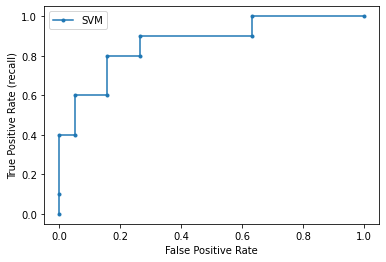

In [87]:
# calculate roc curve
svm_fpr, svm_tpr, _ = roc_curve(y_test, probability[:, 1])
# plot roc curve
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (recall)')
plt.legend()
plt.show()

#### Precision-Recall Cruve Plot

In a situation of unbalanced classes, like the one in this project, it is better to use a Precision - Recall curve instead of a ROC curve.

The precision-recall curve presents the **tradeoff between precision and recall** at different threshold. We choose a value of the threshold that matches to de desired values of precision and recall.

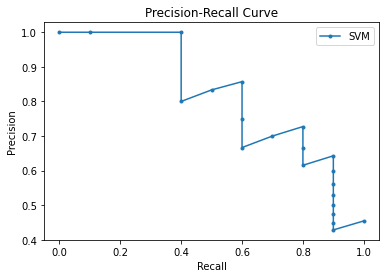

In [88]:
# calculate precision-recall curve
svm_precision, svm_recall, thresholds = precision_recall_curve(y_test, probability[:, 1])
# plot the curve
plt.plot(svm_recall, svm_precision, marker='.', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

## 12. Threshold Tuning

In our project we need to minimize the FP rate, so maximize the precision. A high number of FN (reject coaster design that were actually good) is not a problem, **beacuse designing a new ride is less expensive that building a ride that is not good to guests**. So we choose a threshold that **maximizes the precision**. The following plots represents the choosen threshold.

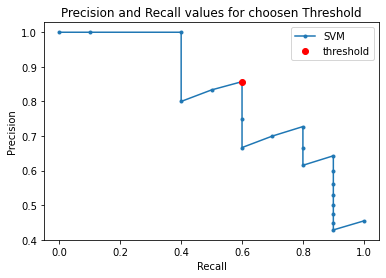

In [89]:
# plotting precision-recall curve with the choosen threshold

plt.plot(svm_recall, svm_precision, marker='.', label='SVM')
plt.plot(svm_recall[-6], svm_precision[-6], "ro", label="threshold")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision and Recall values for choosen Threshold')
plt.show()

The value of the choosen threshold is:

In [90]:
# print the threshold value
print("Threshold value = %.4f" % thresholds[-6])

Threshold value = 0.3814


As we see, the **number of false positive with this threshold is 1** and the precision is 0.86. We have 4 false negatives and a recall euqual to 0.6.

In [91]:
# choosen threshold results
predictions=probs_to_prediction(probability, thresholds[-6])
make_classification_score(y_test, predictions)

,Accuracy,f1,Recall,Precision,Specificity,TP,TN,FP,FN,y_test size
0,0.827586,0.705882,0.6,0.857143,0.947368,6,18,1,4,29


We can try also different solutions by allowing a very small number of false positives and lowering the false negatives. **It is up to us to decide what is better given the actual costs** of building a not-good ride or hire more designers.

## 13. Further Steps

### Evaluate the design of a new ride

After the tuning it is now possible to **use this model to test the design of a ride before building it**. So we write a function that takes as input the details of the ride and tells us if thie ride is good or not in the game.

In [92]:
# using the model and the selected threshold 
# o evaluate some new ride designs
def final_model(ride_specs):
    ride_class=[]
    # normalize with the fitted mmscaler
    ride_specs = mmscaler.transform(ride_specs)
    # predict porbability
    prob=grid.predict_proba(ride_specs)
    # check threshold
    for x in prob[:,1]:
        if x > 0.3814:
            ride_class.append(1)
        else:
            ride_class.append(0)
    return ride_class

Creating a dataframe with some rides designs to test.

In [93]:
# columns name
cols = ["Airtime_Count", "Max_Speed", "Biggest_Drop", "Max_Vertical_g", "Track_Lenght", "Min_Vertical_g"]
# TechSpecs of the new rides
ride_specs=[["5", "140", "61", "5", "854", "-2"],
            ["3", "110", "40", "4", "700", "-3"]]
# create a dataframe
ride_specs = pd.DataFrame(data=ride_specs, columns=cols)

Test the ride designs to see if they are good. As we see, **the first ride design it's actually good**. I tested this ride in the game by creating it, and it's rated good.

In [94]:
# test the ride designs
res = final_model(ride_specs)
res

[1, 0]

### Model Deployment

Another possible step is the deployment of the model, for example **creating a web application** with a custom GUI and possibly other services. This can be done using Flask for instance.

## 14. Drawing Conclusions - Summary

We started by **cleaning the data and analyzing** it with visualization. Then, to be able to build a machine learning model, we **transformed the categorical data** into numeric variables (feature engineering). After transforming the data, we **selected the SVM algorithm** and tested it using default parameters. We **tuned the hyperparameters** of the SVM model (best performance model) for model optimization, obtaining a precision of almost 100% and a recall of 0.4%. Finally, we **tuned the threshold** and obtained a precision of 0.86% and a recall of 0.6. <br>

I am satisfied with this result of this work. The number of FN is not too high to obtain a good precision. Another important aspect is the choice of the model, i used SVM in this project but maybe other algorithm/methods performs better (for example decision trees). I tried to follow and cover all the steps involved in a real Data Science pipeline and be as precise as possible in the description of all the passages. Although i followed a linear process, machine learning projects tend to be iterative rather than linear processes, where previous steps are often revisited as we learn more about the problem to solve. <br><br> I conclude keeping in my mind that *"All models are wrong, but some are useful"*, i hope this can be a useful one.

Bianchi Edoardo, 2022